# Mini-project 5.3

##Initial data exploration and assessment

In [ ]:
# First and foremost, let's import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Then, we import our data
url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv'
df = pd.read_csv(url)
print("Number of records:", df.shape[0])
df.head()

Number of records: 19535


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
2,658,3.434232,3.680896,1.678708,88.089916,78.704806
3,749,2.094656,7.120927,1.639670,77.661625,82.386700
4,676,3.538228,5.956472,3.225336,75.226352,67.153220


In [ ]:
# Check for null and duplicate values
print(df.isnull().sum())
print(f"\nDuplicates: {df.duplicated().sum()}")

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
dtype: int64

Duplicates: 0


In [ ]:
# Descriptive statistics for the datasets
df.describe(percentiles=[.25, .5, .75, .95]).T

,count,mean,std,min,25%,50%,75%,95%,max
Engine rpm,19535.0,791.239263,267.611193,61.000000,593.000000,746.000000,934.000000,1324.000000,2239.000000
Lub oil pressure,19535.0,3.303775,1.021643,0.003384,2.518815,3.162035,4.055272,5.058040,7.265566
Fuel pressure,19535.0,6.655615,2.761021,0.003187,4.916886,6.201720,7.744973,12.208475,21.138326
Coolant pressure,19535.0,2.335369,1.036382,0.002483,1.600466,2.166883,2.848840,4.438415,7.478505
lub oil temp,19535.0,77.643420,3.110984,71.321974,75.725990,76.817350,78.071691,84.940778,89.580796
Coolant temp,19535.0,78.427433,6.206749,61.673325,73.895421,78.346662,82.915411,88.612891,195.527912


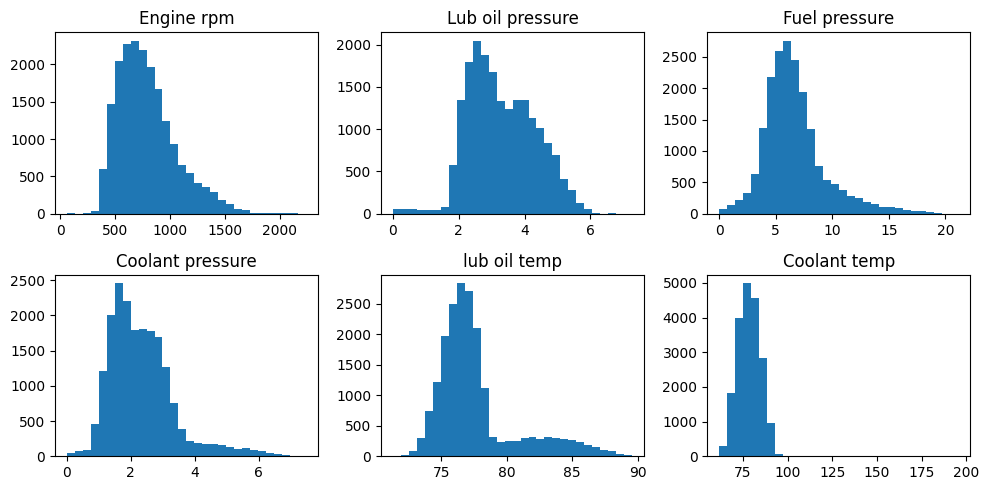

In [ ]:
# Set the size of each figure
plt.figure(figsize=(10, 5))

# Loops over each index (i) and column (col), plotting a histogram with a title in a 2-row, 3-col format
for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(df[col], bins=30)
    plt.title(col)

# Adjusts padding for neatness and displays plots
plt.tight_layout()
plt.show()


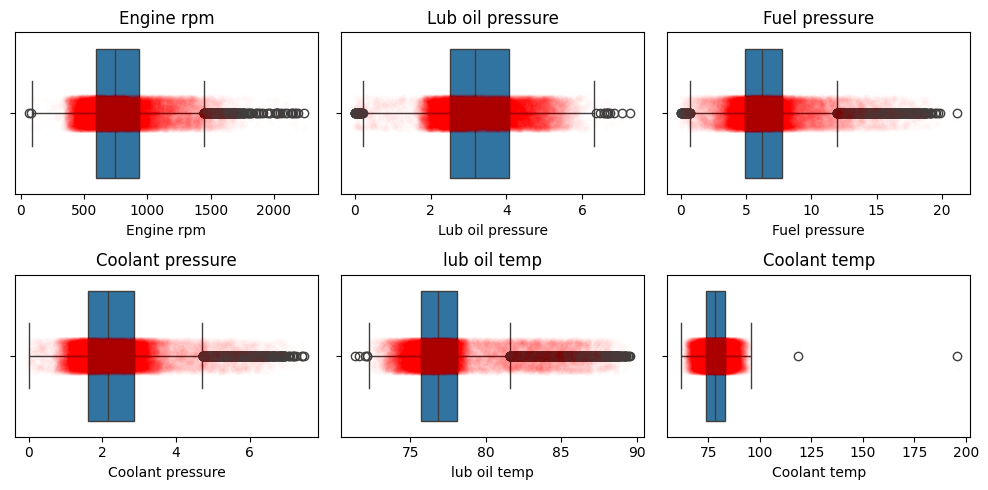

In [ ]:
# Set the size of each figure
plt.figure(figsize=(10, 5))

# Loops over each index (i) and column (col), plotting a box-plot with a title in a 2-row, 3-col format
for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    sns.stripplot(x=df[col], color='red', alpha=0.01)
    plt.title(col)

# Adjusts padding for neatness and displays plots
plt.tight_layout()
plt.show()


##Anomaly detection: Statistical methods

In [ ]:
# Using the IQR to identify features and cataloguing them per record via binary features
for col in df.columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  lower_outlier_bound = q1 - 1.5*iqr
  upper_outlier_bound = q3 + 1.5*iqr

  # Create an outlier column for each existing column and fill it with values (1 if outside bounds, 0 otherwise)
  df[col + '_outlier'] = ((df[col] < lower_outlier_bound) | (df[col] > upper_outlier_bound)).astype(int)

df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm_outlier,Lub oil pressure_outlier,Fuel pressure_outlier,Coolant pressure_outlier,lub oil temp_outlier,Coolant temp_outlier
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0,0,0
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,0,0,0,1,0,0
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,0,0,1,0
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0,0,0
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0,0,0


In [ ]:
# Get list of all binary outlier columns
outlier_cols = []
for col in df.columns:
  if '_outlier' in col:
    outlier_cols.append(col)

# For each record, defines a new column which sums the 0s and 1s (per row axis) from the binary outlier columns, telling us how many outliers it has
df['outlier_count'] = df[outlier_cols].sum(axis=1)

df.head()


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm_outlier,Lub oil pressure_outlier,Fuel pressure_outlier,Coolant pressure_outlier,lub oil temp_outlier,Coolant temp_outlier,outlier_count
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0,0,0,0
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,0,0,0,1,0,0,1
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,0,0,1,0,1
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0,0,0,0
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0,0,0,0


In [ ]:
# We experiment with various thresholds (number of outlier columns we need to consider a record an outlier)
for threshold in range(1, 7):  # Try from 1 to 6 features being outliers

    # New dataframe (anomalies) which only includes records where the outlier_count >= threshold
    anomalies = df[df['outlier_count'] >= threshold]

    percentage = (len(anomalies) / len(df)) * 100
    print(f"Threshold = {threshold}, Anomalies = {percentage:.2f}%")

Threshold = 1, Anomalies = 23.73%
Threshold = 2, Anomalies = 2.16%
Threshold = 3, Anomalies = 0.06%
Threshold = 4, Anomalies = 0.00%
Threshold = 5, Anomalies = 0.00%
Threshold = 6, Anomalies = 0.00%


We choose our threshold value such that the total percentage of records classed as outliers falls between 1-5%, as outlined in the project brief. As can be seen above, that would be a threshold value of 2, meaning if a record has two features with outlier values, we can consider the whole record to be an outlier itself.

This value balances sensitivity as we can see than a threshold value of 1 would class nearly a quarter (23.73%) of all records as outliers, whereas a value of 3 would only class 0.6% of them as outliers.

##Anomaly detection: Machine learning (ML) models

In [ ]:
from sklearn.preprocessing import StandardScaler

# Before introducing models, we scale features to prepare
features = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']
scaled_features = StandardScaler().fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Compare original vs. scaled DataFrame
print("Original DataFrame:\n")
print(df[features].head())
print("\nScaled DataFrame:\n")
print(scaled_df.head())

Original DataFrame:

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  
0     76.272417     69.884609  
1     73.222679     74.907314  
2     88.089916     78.704806  
3     77.661625     82.386700  
4     75.226352     67.153220  

Scaled DataFrame:

   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0   -0.408212         -0.892819      -0.738304          0.495596   
1   -0.695950          2.117332      -0.083759          3.273154   
2   -0.497896          0.127697      -1.077426         -0.633625   
3   -0.157842         -1.183534       0.168533         -0.671293   
4   -0.430633     

###One-Class SVM Model

In [ ]:
from sklearn.decomposition import PCA

# For PCA visualisation purposes (used later)
def plot_embedding(pca, title, y_pred):
    labels = {-1: 'Anomaly', 1: 'Normal'}
    for i in np.unique(y_pred):
        plt.scatter(pca[y_pred == i, 0],
                    pca[y_pred == i, 1],
                    label=str(i))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

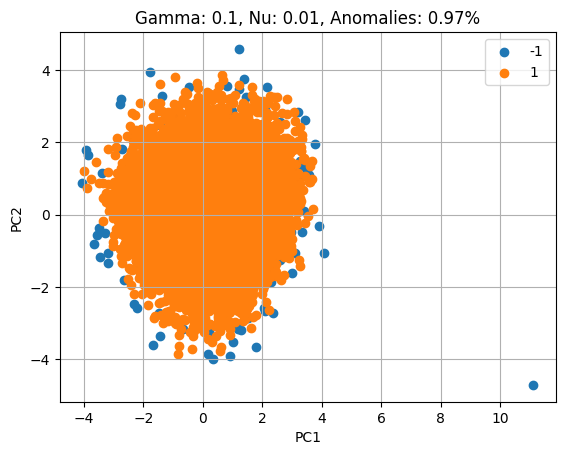

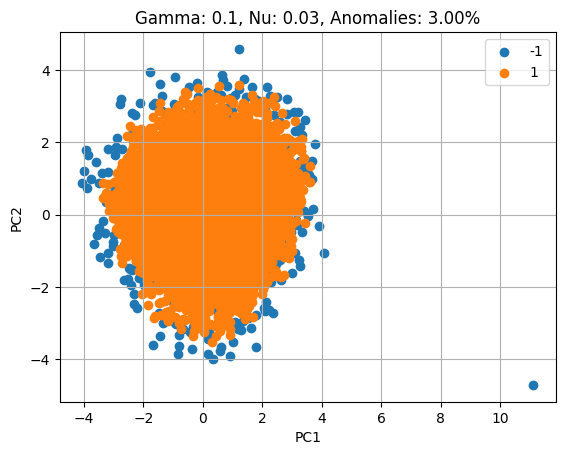

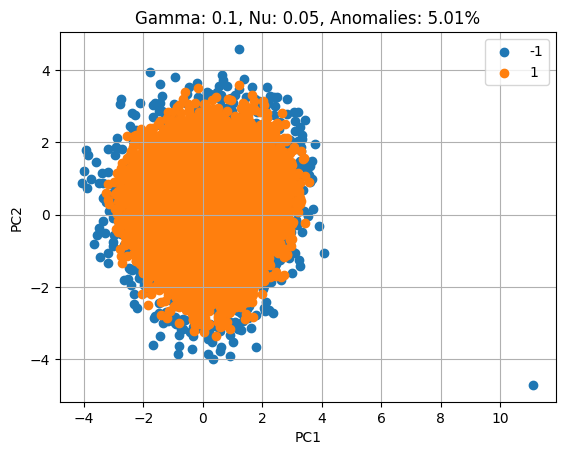

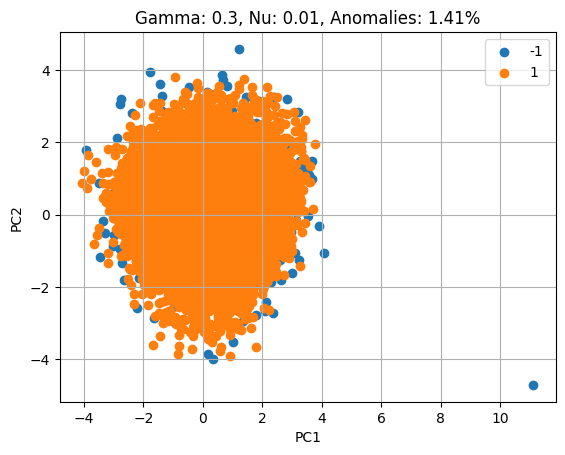

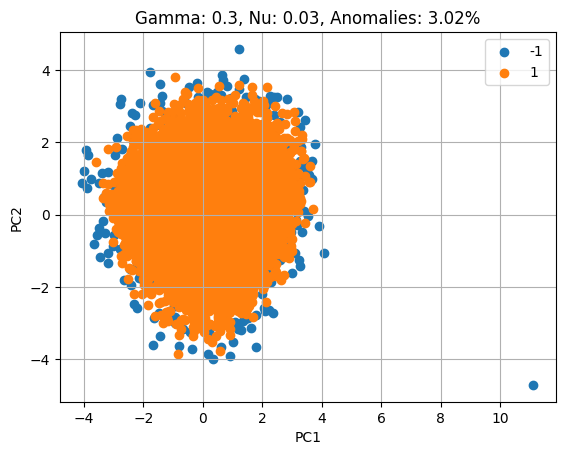

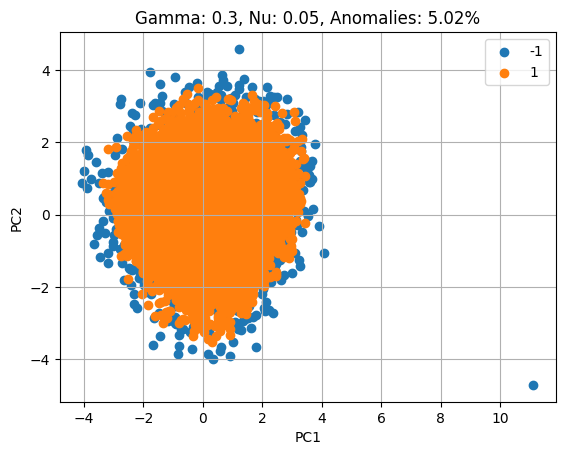

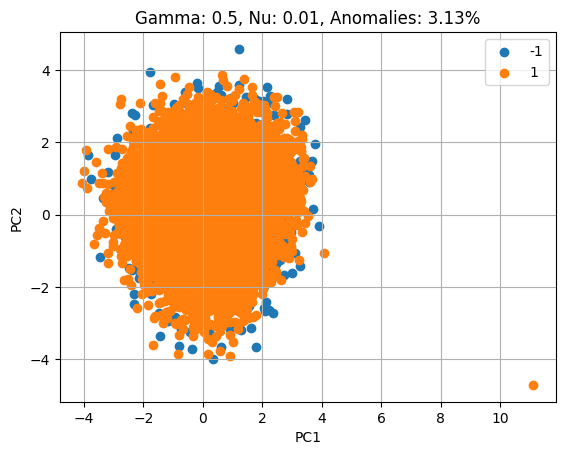

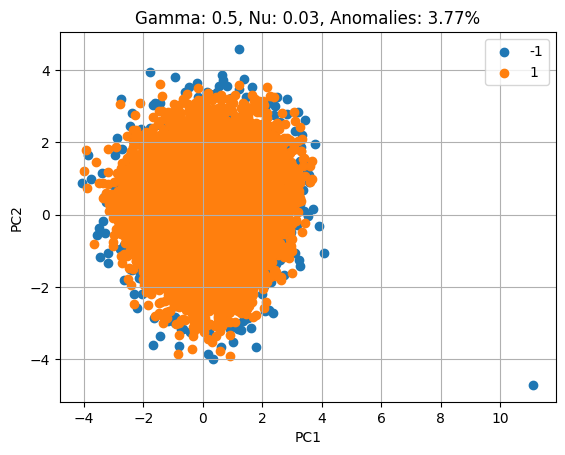

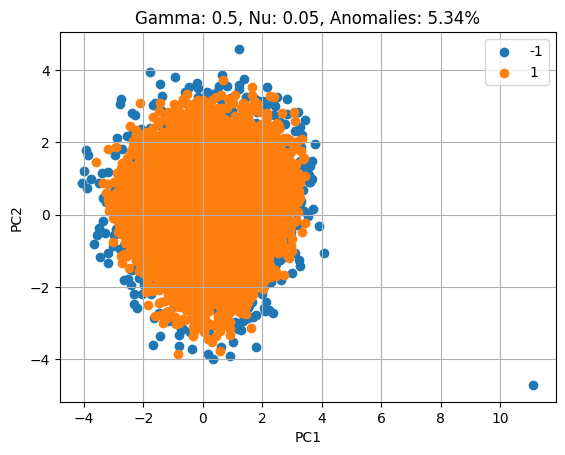

In [ ]:
from sklearn.svm import OneClassSVM

# Inputting parameter configurations for our model test out
gammas = [0.1, 0.3, 0.5]
nus = [0.01, 0.03, 0.05]

# Looping over various gamma and nu configurations
for gamma in gammas:
    for nu in nus:
        # Build and train the model
        svm_model = OneClassSVM(kernel='rbf', gamma=gamma, nu=nu)
        svm_model.fit(scaled_features)

        # Predicting outliers (-1) + non-outliers (1) and creating a binary feature
        svm_pred = svm_model.predict(scaled_features)
        anomaly_percent = (svm_pred == -1).mean() * 100

        # PCA for visualisation
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_features)

        # Plot
        title = f"Gamma: {gamma}, Nu: {nu}, Anomalies: {anomaly_percent:.2f}%"
        plot_embedding(pca_result, title, svm_pred)

###Isolation Forest Model

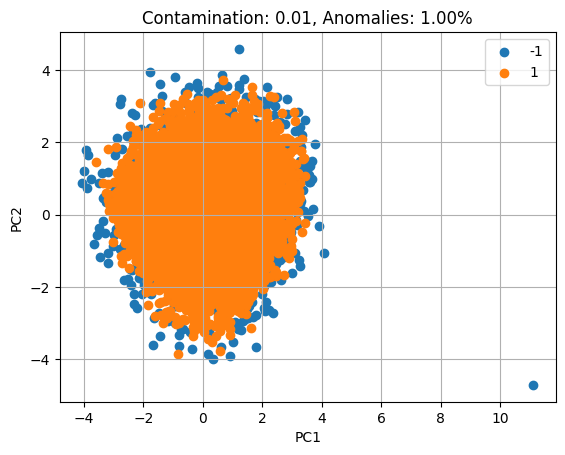

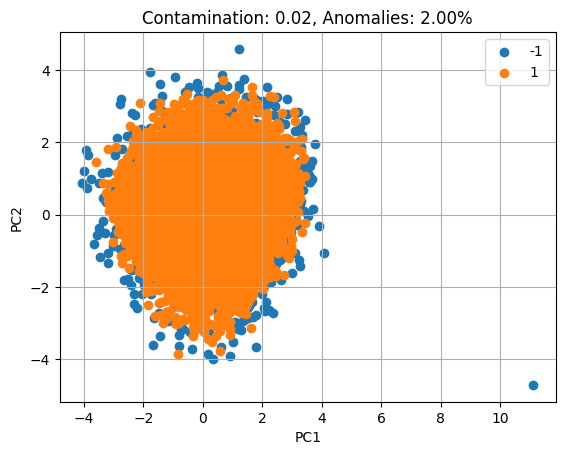

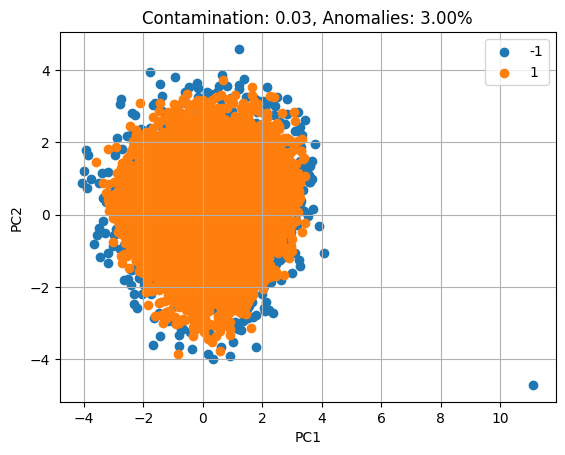

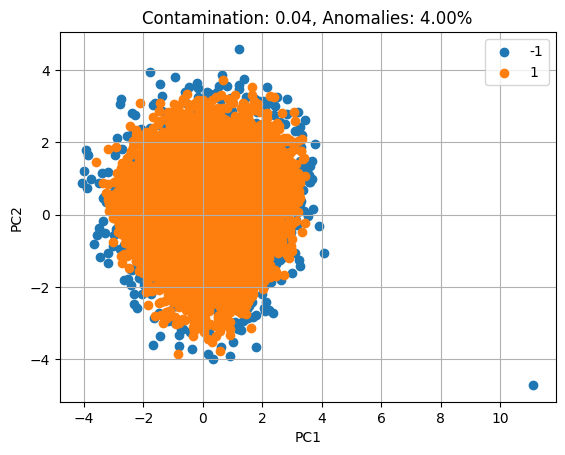

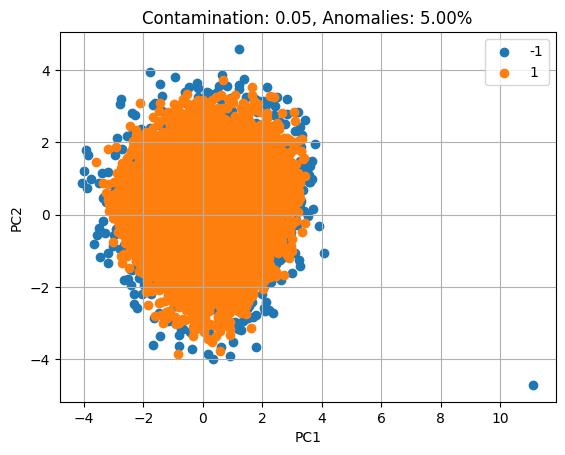

In [ ]:
from sklearn.ensemble import IsolationForest

# Inputting parameter configurations for our model test out
contaminations = [0.01, 0.02, 0.03, 0.04, 0.05]

# PCA for visualisation
pca = PCA(n_components=2)
forest_pca = pca.fit_transform(df[features])

# Looping over various contamination values
for contamination in contaminations:
    forest_model = IsolationForest(n_estimators=100, contamination=contamination, random_state=42)
    forest_model.fit(df[features])
    forest_pred = forest_model.predict(df[features])
    anomaly_percent = (forest_pred == -1).mean() * 100

    # Plot
    title = f"Contamination: {contamination}, Anomalies: {anomaly_percent:.2f}%"
    plot_embedding(pca_result, title, svm_pred)


###One-Class SVM and Isolation Forest

Both methods used unsupervised learning.

- One-Class SVM has high sensitivity to feature scaling and it's initial parameters proved too sensitive, requiring the gamma value to be adjusted to fit the project's requirements of a 1-5% anomaly detection rate. This suggested a tendency to over-flag data points as anomalies from this model.

- Isolation Forest has an advantage of being able to directly control the anomaly detection rate via the contamination parameter. This model therefore made it easier to manipulate to acquire the desired results as per the project brief.

Overall, the Isolation Forest was more reliable in this case due to its contamination parameter offering direct control over the anomaly detection rate and a lower tendency to be over-sensitive (like the One-Class SVM model).

##Report: Communicating business impact and insights

See report document.